## 5.2 합성곱 신경망 맛보기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # 데이터 전처리 라이브러리
from torch.utils.data import Dataset, DataLoader

In [ ]:
# 파이토치는 기본적으로 GPU 사용권장
# CPU or GPU 장치 확인
device = torch.device("cude:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# fashion_mnist 데이터셋 내려받기
train_dataset = torchvision.datasets.FashionMNIST("../chap05/data", download=True,
                                                  transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("../chap05/data", download=True,
                                                  train=False, transform=transforms.Compose([transforms.ToTensor()]))

주요 파라미터
1. 첫 번째 파라미터: FashionMNIST를 내려받을 위치 지정
2. download: download를 True로 변경해주면 첫 번째 파라미터의 위치에 해당 데이터셋이 있는지 확인한 후 내려받음.
3. transform: 이미지를 텐서(0~1)로 변경

In [ ]:
# fashion_mnist 데이터를 데이터로더에 전달
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=100)

1. 첫 번째 파라미터: 데이터를 불러올 데이터셋 지정
2. batch_size: 데이터를 배치로 묶어 줌. 100개 단위로 데이터를 묶어서 불러옴.

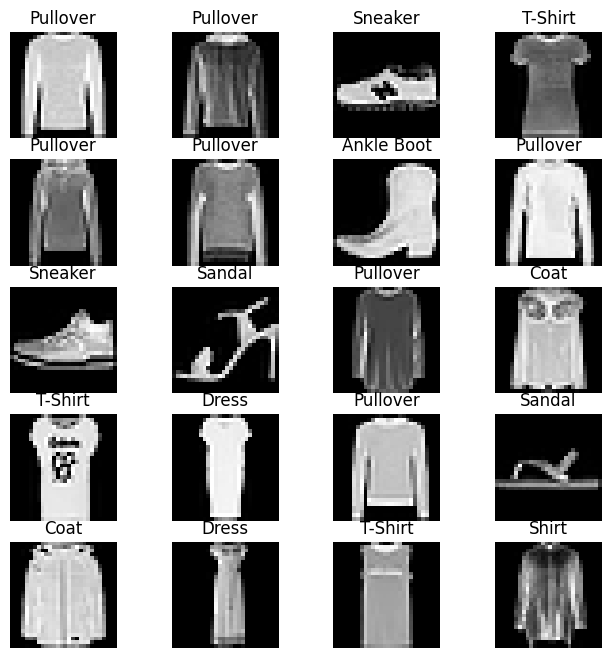

In [ ]:
# 분류에서 사용될 클래스 정의
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2:'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
  img_xy = np.random.randint(len(train_dataset));
  img = train_dataset[img_xy][0][0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(labels_map[train_dataset[img_xy][1]])
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# 심층 신경망 모델 생성
class FashionDNN(nn.Module):
  def __init__(self):
    super(FashionDNN, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=256)
    self.drop = nn.Dropout(0.25)
    self.fc2 = nn.Linear(in_features=256, out_features=128)
    self.fc3 = nn.Linear(in_features=128, out_features=10)

  def forward(self, input_data):
    out = input_data.view(-1, 784)
    out = F.relu(self.fc1(out))
    out = self.drop(out)
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out

In [ ]:
def add(num1,num2):
    result=num1+num2
    return result

print(add(1,2))
print(add(2,3))

3
5


In [ ]:
class Calc:
    def __init__(self):
        self.result=0

    def add(self, num1,num2):
        self.result =num1+num2
        return self.result
obj1=Calc()
obj2=Calc()

print(obj1.add(1,2))
print(obj1.add(2,3))
print('---------------')
print(obj2.add(2,3))
print(obj2.add(2,3))

3
5
---------------
5
5


1. 클래스 형태의 모델은 항상 torch.nn.Module을 상속받음.
- __init__()은 객체가 갖는 속상 값을 초기화하는 역할을 함.
- 객체가 생성될 때 자동으로 호출됨.
- super(FashionDNN, self).__init__()은 nn.Module 클래스를 상속받겠다는 의미로 이해

2. nn은 딥러닝 모델(네트워크) 구성에 필요한 모듈이 모여 있는 패키지, Linear는 단순 선형 회귀 모델을 만들 때 사용.
- in_features: 입력의 크기
- out_features: 출력의 크기

3. torch.nn.Dropout(p)는 p만큼의 비율로 텐서 값이 0이 되고, 0이 되지 않는 값들은 기존 값에 (1/(1-p))만큼 곱해져 커짐.

4. forward() 함수는 모델이 학습 데이터를 입력받아 순전파 학습을 진행. 반드시 forward라는 이름의 함수여야 함.

5. 파이토치에서 사용하는 뷰(view)는 넘파이의 reshape과 같은 역할로 텐서의 크기(shape)를 변경해주는 역할을 함.

6. 활성화 함수를 지정할 때는 다음 두 가지 방법이 가능.
- F.relu(): forward() 함수에서 정의
- nn.ReLU(): __init__() 함수에서 정의

In [ ]:
import torch
import torch.nn as nn

inputs = torch.randn(64,3,244,244)
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
outputs = conv(inputs)
layer = nn.Conv2d(1,1,3)

In [ ]:
import torch.nn.functional as F

inputs = torch.randn(64,3,244,244)
weight = torch.randn(64,3,3,3)
bias = torch.randn(64)
outputs = F.conv2d(inputs, weight, bias, padding=1)

In [ ]:
# 심층 신경망에서 필요한 파라미터 정의
learning_rate = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
num_epochs=5
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]

predictions_list=[]
labels_list=[]

for epoch in range (num_epochs):
    for images , labels in train_loader:
        images , labels = images.to(device) , labels.to( device)
        train = Variable( images.view(100, 1, 28, 28))
        labels = Variable( labels)
        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss .backward()
        optimizer.step()
        count += 1

        if not (count % 50 ):
            total = 0
            correct = 0
            for images , labels in test_loader:
                images , labels = images.to(device) , labels.to(device)
                labels_list.append(labels)
                test = Variable( images.view( 100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max( outputs, 1)[ 1].to(device)
                predictions_list.append (predictions)
                correct += (predictions == labels).sum()
                total += len(labels)
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format (count,
                                                                   loss.data, accuracy))

Iteration: 500, Loss: 0.5947574377059937, Accuracy: 83.11000061035156%
Iteration: 1000, Loss: 0.48389315605163574, Accuracy: 84.33999633789062%
Iteration: 1500, Loss: 0.37764549255371094, Accuracy: 84.51000213623047%
Iteration: 2000, Loss: 0.3839038908481598, Accuracy: 85.43000030517578%
Iteration: 2500, Loss: 0.2676468789577484, Accuracy: 85.7699966430664%
Iteration: 3000, Loss: 0.2919762432575226, Accuracy: 86.3499984741211%


1. 일반적으로 배열이나 행렬 같은 리스트(list)를 사용하는 방법은 다음과 같음
- 비어 있는 배열이나 행렬 만듦.
- append 메서드를 이용해 데이터를 하나씩 추가.

2. for 구문을 사용해 레코드(행, 가로줄)를 하나씩 가져옴.

3. 모델이 데이터를 처리하기 위해선느 모델과 데이터가 동일한 장치(CPU or GPU)에 있어야 함.

4. Autograd는 자동 미분을 수행하는 파이토치의 핵심 패키지로, 자동 미분에 대한 값ㅇ르 저장하기 위해 테이프(tape)를 사용함. torch.autograd 패키지 안에 있는 Variable을 이용해야 동작함.

5. 분류 문제에 대한 정확도는 전체 예측에 대한 정확한 예측의 비율로 표현할 수 있으며, 코드는

classfication accuracy = correct predictions / total predictions

과 같음.

In [44]:
# 합성곱 네트워크 생성
class FashionCNN(nn.Module):
  def __init__(self):
    super(FashionCNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
    self.drop = nn.Dropout2d(0.25)
    self.fc2 = nn.Linear(in_features=600, out_features=120)
    self.fc3 = nn.Linear(in_features=120, out_features=10)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out = self.drop(out)
    out = self.fc2(out)
    out = self.fc3(out)
    return out

1. nn.Sequential을 사용하면 __init__()에서 사용할 네트워크 모델들을 정의해줄 뿐만 아니라, forward() 함수에서 구현된 순전파를 계층(layer) 형태로 좀 더 가독성이 뛰어난 코드로 작성할 수 있음.

2. 합성곱층은 합성곱 연산을 통해 이미지의 특징을 추출함. 합성곱이란 커널이라는 nxm 크기의 행렬이 높이x너비 크기의 이미지를 처음부터 끝까지 훑으면서 각 원소 값끼리 곱한 후 모두 더한 값을 출력함.
- in_channels: 입력 채널의 수를 의미
- out_channels: 출력 채널의 수
- kernel_size : 커널 크기를 의미, 논문에 따라 필터라고도 함.
- padding: 패딩 크기를 의미하는 것으로 출력 크기 조정 위해 입력 데이터 주위에 0을 채움.

3. BatchNorm2d는 학습 과정에서 각 배치 단위별로 데이터가 다양한 분포를 가지더라도 평균과 분산을 이용해 정규화하는 것을 의미.



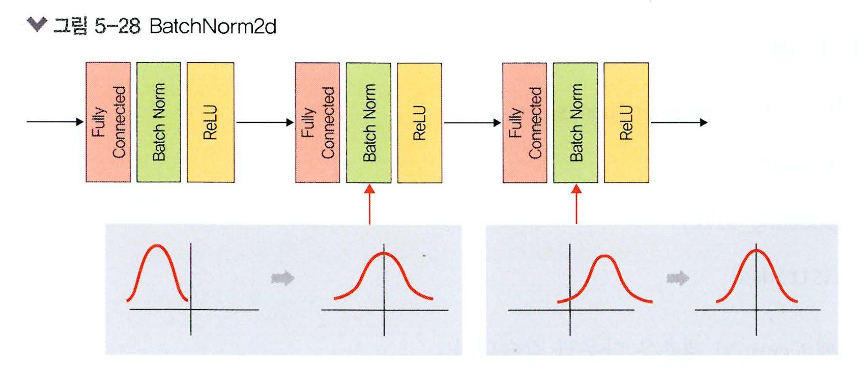

4. MaxPool2d는 이미지 크기를 축소시키는 용도로 사용. 풀링 계층은 합성곱층의 출력 데이터를 입력받아 출력 데이터의 크기를 줄이거나 특정 데이터를 강조하는 용도로 사용됨.
- kenel_size: mxn 행렬로 구성된 가중치
- stride: 입력 데이터에 커널을 적용할 때 이동할 간격을 의미

5. 클래스를 분류하기 위해 이미지 형태의 데이터를 배열 형태로 변환해 작업해야 함. 이때 Conv2d에서 사용하는 하이퍼파라미터 값들에 따라 출력 크기가 달라짐.

- in_feauters: 입력 데이터의 크기를 의미. 중요한 것은 이전까지 수행했던 Conv2d, MaxPool2d는 이미지 데이터를 입력받아 처리.

### Conv2d 계층에서의 출력 크기 구하는 공식

- 출력 크기 = (W-F+2P)/S+1
  - W: 입력 데이터 크기(input_volume_size)
  - F: 커널 크기(kernel_size)
  - P: 패딩 크기(padding_size)
  - S: 스트라이드(strides)

### MaxPool2d 계층에서의 출력 크기 구하는 공식

- 출력 크기 = IF/F
  - IF: 입력 필터의 크기(input_filter_size)
  - F: 커널 크기(kernel_size)

- out_features: 출력 데이터의 크기를 의미

6. 합성곱층에서 완전연결층으로 변경되기 때문에 데이터 형태를 1차원으로 바꾸어 줌.

In [46]:
# 합성곱 네트워크를 위한 파라미터 정의
learning_rate = 0.001
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [48]:
from torch._higher_order_ops.aoti_call_delegate import trace_aoti_call_delegate
# 모델 학습 및 성능 평가

num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100,1,28,28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50):
      total = 0
      correct = 0
      for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)
        test = Variable(images.view(100,1,28,28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()
        total += len(labels)

      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if not (count % 500):
      print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data,
      accuracy))

Iteration: 500, Loss: 0.41917264461517334, Accuracy: 88.33000183105469%
Iteration: 1000, Loss: 0.3305515944957733, Accuracy: 88.2300033569336%
Iteration: 1500, Loss: 0.3011120557785034, Accuracy: 87.80999755859375%
Iteration: 2000, Loss: 0.189006045460701, Accuracy: 88.9000015258789%
Iteration: 2500, Loss: 0.1155727356672287, Accuracy: 89.4000015258789%
Iteration: 3000, Loss: 0.17248357832431793, Accuracy: 90.37000274658203%
